In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data['mean_sales']=data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

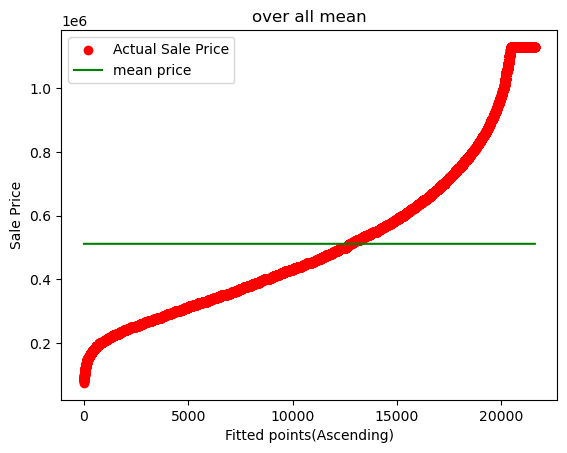

In [4]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['mean_sales'].sort_values(),color='green',label='mean price')
plt.xlabel('Fitted points(Ascending)')
plt.ylabel('Sale Price')
plt.title('over all mean')
plt.legend()

In [5]:
grades_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

C:\Users\INTEL\AppData\Local\Temp\ipykernel_7832\2756592059.py:1: FutureWarning: The provided callable <function mean at 0x0000022C85ECF420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grades_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)


Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [6]:
data['grade_mean']=0
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
    
data['grade_mean'].head()

C:\Users\INTEL\AppData\Local\Temp\ipykernel_7832\1235408150.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
C:\Users\INTEL\AppData\Local\Temp\ipykernel_7832\1235408150.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [7]:
gradewise_list=[]
for i in range(1,11):
    k=data['Sale_Price'][data['Overall Grade']==i]
    gradewise_list.append(k)
    

In [8]:
classwise_list=[]
for i in range(1,11):
    k=data['Sale_Price'][data['Overall Grade']==i]
    classwise_list.append(k)
    

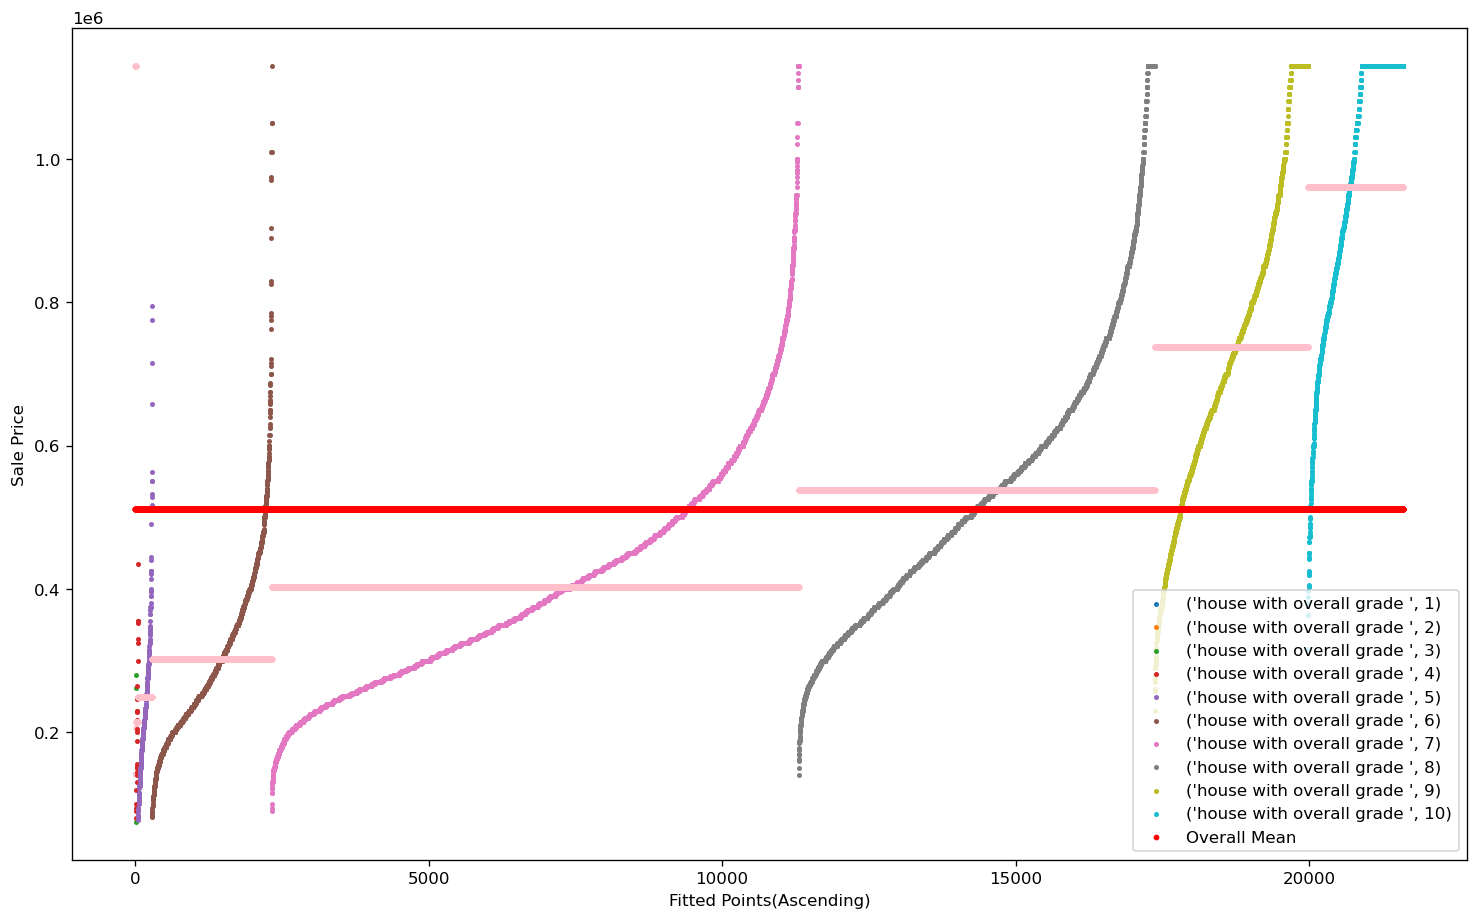

In [9]:
plt.figure(dpi=120,figsize=(15,9))
#plotting sale price grade wise
#z variable is for x axis 
z=0
for i in range(1,11):
    #defining x axix using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    plt.scatter(points,classwise_list[i-1].sort_values(),
               label=('house with overall grade ',i),s=4)
    #plotting grade wise mean
    plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
                s=6,color='pink')
    z=max(points)+1
#plotting overall mean
plt.scatter([q for q in range(0,z)],
           data['mean_sales'],color='red',label='Overall Mean',s=6)
plt.xlabel('Fitted Points(Ascending)')
plt.ylabel('Sale Price')
plt.legend(loc=4)

    

In [10]:
mean_difference=data['mean_sales']-data['Sale_Price']
grade_mean_difference=data['grade_mean']-data['Sale_Price']
mean_difference.size,grade_mean_difference

(21609,
 0        180339.619779
 1       -135760.380221
 2        121882.014720
 3       -201760.380221
 4         27584.082097
              ...      
 21604    177584.082097
 21605    137584.082097
 21606       138.619779
 21607    137584.082097
 21608     77239.619779
 Length: 21609, dtype: float64)

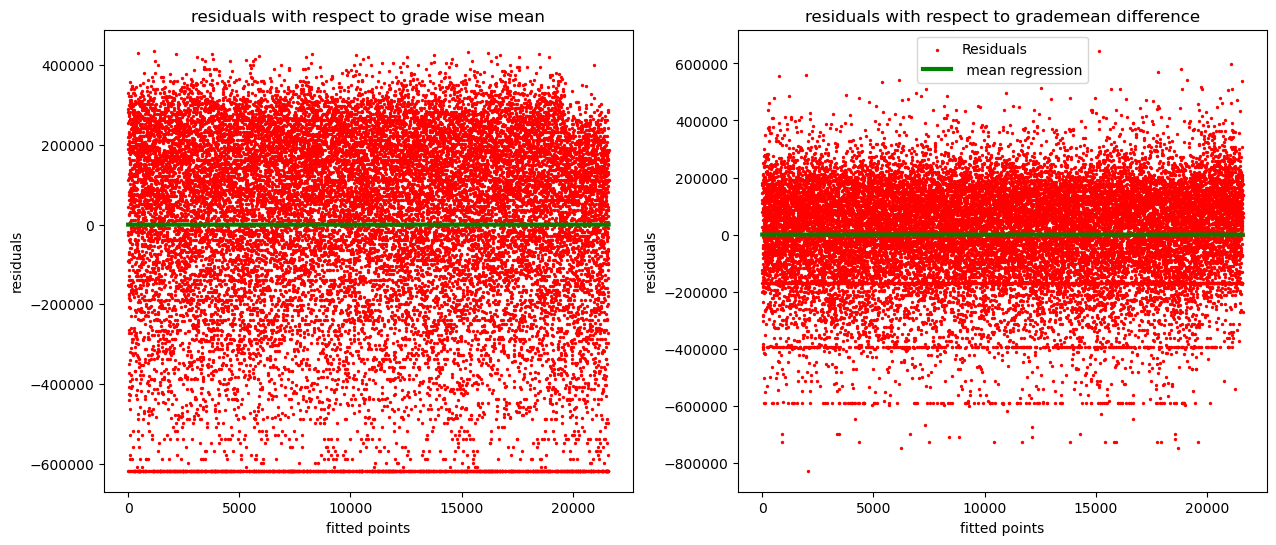

In [11]:
k=range(0,len(data))
l=[0 for i in range (len(data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression',linewidth=3)
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('residuals with respect to grade wise mean')

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label=' mean regression',linewidth=3)
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.legend()
plt.title('residuals with respect to grademean difference')

plt.legend()


In [16]:
#mean error
cost=sum(mean_difference)/len(data)
print(round(cost,7))


0.0


In [17]:
#mean absolute error
Y=data['Sale_Price']
Y_hat1=data['mean_sales']
Y_hat2=data['grade_mean']
n=len(data)

len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [18]:
cost_mean=sum(abs(Y_hat1- Y))/n
cost_mean

199168.78146839526

In [19]:
cost_grade_mean=sum(abs(Y_hat2- Y))/n
cost_grade_mean

137081.70298203363

In [28]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean
#mean_sales=mean_absolute_error(Y_hat1,Y)
#mean_sales

137081.7029820291

In [35]:
#mean squared error
from sklearn.metrics import mean_squared_error
cost_grade_mean=mean_squared_error(Y_hat2,Y)
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean,cost_mean

(30804835720.342426, 62528116847.799576)

In [36]:
#rmse
from sklearn.metrics import mean_squared_error
cost_grade_mean=mean_squared_error(Y_hat2,Y)**0.5
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean,cost_mean

(175513.06424406826, 250056.2273725643)

In [38]:
#R2
Y=data['Sale_Price']
Y_bar=data['mean_sales']
Y_hat=data['grade_mean']
n=len(data)

len(Y),len(Y_bar),len(Y_hat),n

(21609, 21609, 21609, 21609)

In [39]:
mse_mean=mean_squared_error(Y_bar,Y)
mse_mean

62528116847.799576

In [40]:
mse_model=mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [41]:
R2=1-(mse_model/mse_mean)
R2

0.5073442592981836